In [1]:
from __future__ import division
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy as scp
import pylab as pyl

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1234)

%matplotlib inline
%load_ext autoreload
%autoreload 

In [2]:
if not os.path.isdir('Sinkhorn_images'):
    os.makedirs('Sinkhorn_images')

In [3]:
"""To compute distance matrix"""
def distmat(x,y):
    return np.sum( x**2,0 )[:,None] + np.sum( y**2,0 )[None,:] - 2*x.transpose().dot(y)

"""To Normalise a vector"""
normalize = lambda a: a/np.sum( a )

"""To Compute P"""
def GetP(u,K,v):
    return u[:,None]*K*v[None,:]

def plotp(x, col,plt, scale=200, edgecolors="k"):
  return plt.scatter( x[0,:], x[1,:], s=scale, edgecolors=edgecolors,  c=col, cmap='plasma', linewidths=2 )

In [4]:
import computational_OT

## Sinkhorn for varying N and fixed $\varepsilon$

In [5]:
def randomsampledata(N):
  x = []
  y = []
  N=np.sort(N)
  for i in range(len(N)):
    x.append(np.random.rand(2,N[i])-0.5)
    theta= 2*np.pi*np.random.rand(1,N[i])
    r = 0.8+0.2*np.random.rand(1,N[i])
    y.append(np.vstack((np.cos(theta)*r,np.sin(theta)*r)))
  
  return x,y,N

In [6]:
N = [ 200,400,600,800,1000 ]
x,y,N = randomsampledata(N)

In [7]:
# Sinkhorn
print("Sinkhorn.... ")
SinkhornP = []
results_Sinkhorn = []
times_Sinkhorn = []
Pmatrix_dist_linVSsinkhorn = []
for i in range(len(N)):

  
  xi,yi = x[i],y[i]
  #Cost matrix
  C = distmat(xi,yi)
  
  # a and b
  a = normalize(np.ones(N[i]))
  a = a.reshape(a.shape[0],-1)
  b = normalize(np.ones(N[i]))
  b = b.reshape(b.shape[0],-1)
  
  #Epsilon
  epsilon = .06

  #Kernel
  K = np.exp(-C/epsilon)


  print("Doing for ",N[i])
  print( " |- Iterating")

  #Inflating
  u = a
  v = b

  start = time.time()
  Optimizer = computational_OT.Sinkhorn(K,a,b,u,v,epsilon)
  out = Optimizer._update()
  results_Sinkhorn.append(out)
  end = time.time()
  times_Sinkhorn.append(end-start)
  print( " |- Computing P")
  print( "" )
  SinkhornP.append(GetP(out['potential_f']/epsilon,K,out['potential_g']/epsilon))
  

Sinkhorn.... 
Doing for  200
 |- Iterating
Terminating after iteration:  197
 |- Computing P

Doing for  400
 |- Iterating
Terminating after iteration:  179
 |- Computing P

Doing for  600
 |- Iterating
Terminating after iteration:  179
 |- Computing P

Doing for  800
 |- Iterating
Terminating after iteration:  180
 |- Computing P

Doing for  1000
 |- Iterating
Terminating after iteration:  192
 |- Computing P



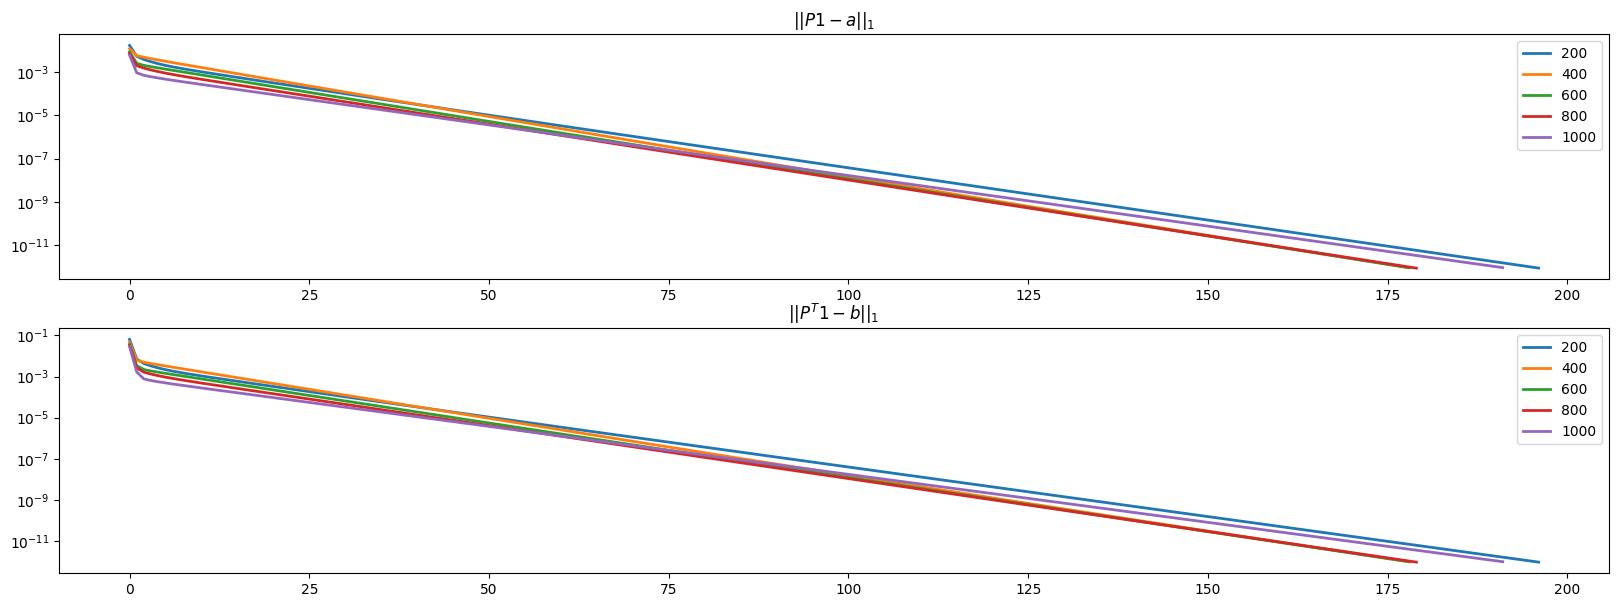

In [8]:
plt.figure(figsize = (20,7))

plt.subplot(2,1,1),
plt.title("$||P1 -a||_1$")
for result in results_Sinkhorn:
  plt.plot( np.asarray(result['error_a']), linewidth = 2)
plt.yscale( 'log')
plt.legend([str(i) for i in N],loc="upper right")

plt.subplot(2,1,2)
plt.title("$||P^T 1 -b||_1$")
for result in results_Sinkhorn:
  plt.plot( np.asarray(result['error_b']), linewidth = 2)
plt.yscale( 'log')
plt.legend([str(i) for i in N],loc="upper right")
plt.savefig("Sinkhorn_images/ConvergenceSinkhorn.png")
plt.show()

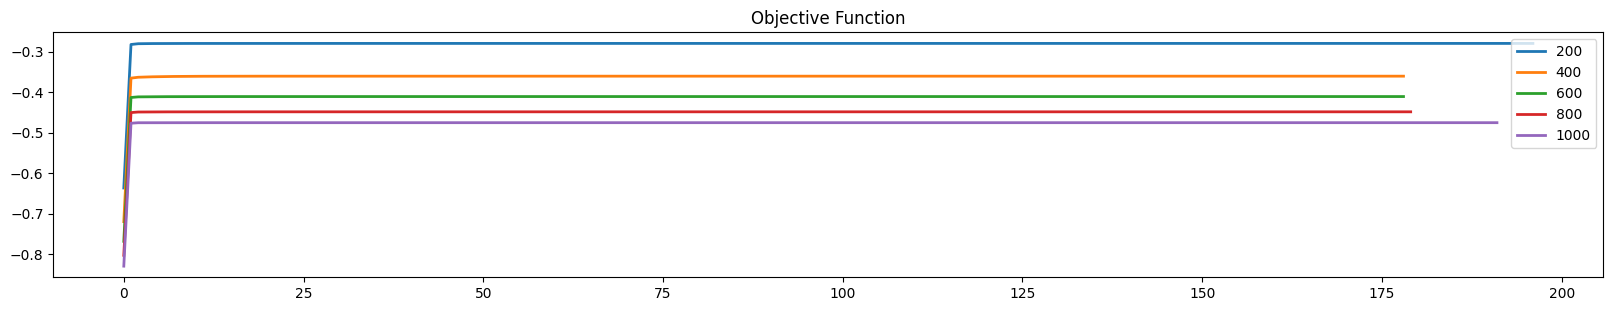

In [9]:
plt.figure(figsize = (20,7))
plt.subplot(2,1,1),
plt.title("Objective Function")


for result in results_Sinkhorn:
  plt.plot(np.asarray(result['objectives']).flatten(), linewidth = 2)
plt.legend([str(i) for i in N],loc="upper right")
plt.savefig("Sinkhorn_images/ObjectivefunctionSinkhorn.png")
plt.show()

## Sinkhron for varying $\varepsilon$

In [10]:
N = [ 400,500 ]

In [11]:
x = np.random.rand( 2,N[0] )-0.5
theta = 2*np.pi*np.random.rand( 1,N[1] )
r = 0.8+.2*np.random.rand( 1,N[1] )
y = np.vstack( ( r*np.cos( theta ),r*np.sin( theta ) ) )

In [12]:
# Sinkhorn
print("Sinkhorn.... ")
SinkhornP=[]
results_Sinkhorn=[]
times_Sinkhorn=[]
epsilons = [ 1.0, 0.5, 0.3, 0.1, 0.09, 0.05, 0.03, 0.02, 0.01, 0.005, 0.001 ]
Pmatrix_dist_linVSsinkhorn=[]
for eps in epsilons:

  print( "Log-Sinkhorn for epsilon = "+str(eps)+":" )    
  #Cost matrix
  C = distmat(x,y)
  
  # a and b
  a = normalize(np.ones(N[0]))
  a = a.reshape(a.shape[0],-1)
  b = normalize(np.ones(N[1]))
  b = b.reshape(b.shape[0],-1)



  #Kernel
  K = np.exp(-C/eps)


  print( "Doing for (",N[0],N[1],")." )
  print( " |- Iterating" )

  #Inflating
  u = a
  v = b

  start = time.time()
  Optimizer = computational_OT.Sinkhorn( K,a,b,u,v,eps )
  out = Optimizer._update(maxiter = 500 )
  results_Sinkhorn.append( out )
  end = time.time()
  times_Sinkhorn.append( end-start )
  print( " |- Computing P" )
  print( "" )
  SinkhornP.append(GetP(out['potential_f']/eps,K,out['potential_g']/eps))
  

Sinkhorn.... 
Log-Sinkhorn for epsilon = 1.0:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  11
 |- Computing P

Log-Sinkhorn for epsilon = 0.5:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  21
 |- Computing P

Log-Sinkhorn for epsilon = 0.3:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  36
 |- Computing P

Log-Sinkhorn for epsilon = 0.1:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  120
 |- Computing P

Log-Sinkhorn for epsilon = 0.09:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  134
 |- Computing P

Log-Sinkhorn for epsilon = 0.05:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  248
 |- Computing P

Log-Sinkhorn for epsilon = 0.03:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  418
 |- Computing P

Log-Sinkhorn for epsilon = 0.02:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  501
 |- Computing P

Log-Sinkhorn for epsilon 

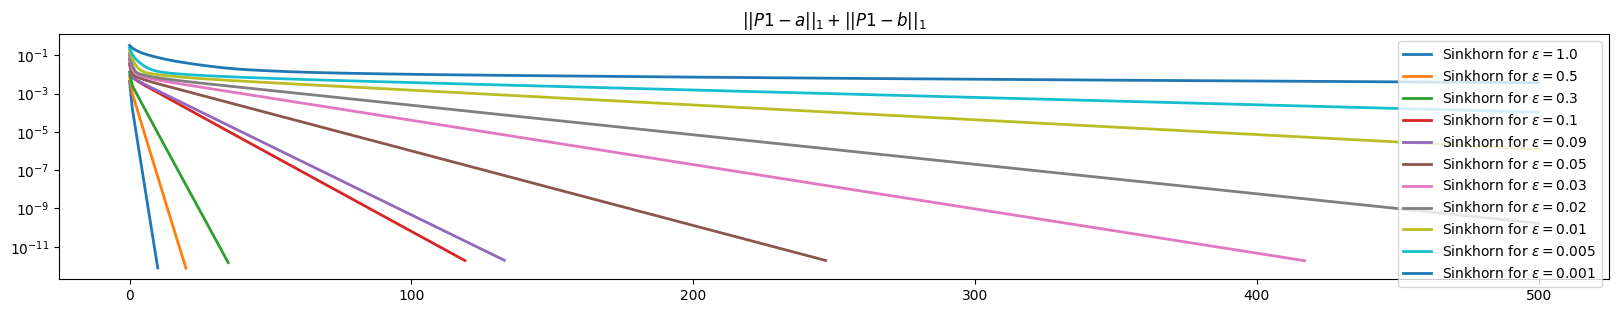

In [13]:
plt.figure( figsize = (20,7) )

plt.subplot(2,1,1),
plt.title( "$||P1 -a||_1+||P1 -b||_1$" )
for i in range( len(results_Sinkhorn) ):
  error=np.asarray( results_Sinkhorn[i]['error_a'] )+np.asarray( results_Sinkhorn[i]['error_b'] )
  plt.plot( error,label='Sinkhorn for $\epsilon=$'+ str(epsilons[i]), linewidth = 2 )
plt.yscale( 'log' )
plt.legend()

plt.savefig("Sinkhorn_images/ConvergenceSinkhornvaryingepsilon.png")
plt.show()

## Log-domain Sinkhorn

In [14]:
N = [ 400,500 ]

a = normalize(np.ones(N[0]))
b = normalize(np.ones(N[1]))

x = np.random.rand( 2,N[0] ) - 0.5
theta = 2*np.pi*np.random.rand( 1,N[1] )
r = 0.8 + .2*np.random.rand( 1,N[1] )
y = np.vstack( ( r*np.cos( theta ),r*np.sin( theta ) ) )
import time




In [15]:
def mina_u(H,epsilon,space_exp):
    return -epsilon*np.log( np.sum(a[:,None] * np.exp(-H/epsilon,out = space_exp),0) )
def minb_u(H,epsilon,space_exp):
    return -epsilon*np.log( np.sum(b[None,:] *np.exp(-H/epsilon, out = space_exp) ,1) )
def mina(H, epsilon, space_exp): return mina_u(H-np.min(H,0),epsilon, space_exp) + np.min(H,0);
def minb(H, epsilon, space_exp): return minb_u(H-np.min(H,1)[:,None],epsilon, space_exp) + np.min(H,1);


def log_sinkhorn(a,b, C,epsilon,f, tol = 1e-14, niter = 500):    
    Err = []
    timestamps = []
    space_exp_g = C.copy()
    space_exp_f = C.copy()
    for i in range(niter):
        start = time.time()
        g = mina(C-f[:,None], epsilon, space_exp_g)
        end = time.time()
        f = minb(C-g[None,:], epsilon, space_exp_f)
        # generate the coupling
        P = a[:,None]*np.exp((f[:,None]+g[None,:]-C)/epsilon) * b[None,:] # line (*)
        timestamps.append(1e-3*(end-start))
        # check conservation of mass
        Err.append( np.linalg.norm(np.sum(P,0)-b,1) )
        if Err[i] < tol:
            print("Terminating after iteration: ",i+1)
            break
    return  { 'time' : timestamps,
        'error'      : Err,
        'potential_f': f+epsilon*np.log(a),
        'potential_g': g+epsilon*np.log(b)  #Change of convention because of line (*)
    }

### For varying $\varepsilon$

Log-Sinkhorn for epsilon = 1.0:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  14
Log-Sinkhorn for epsilon = 0.5:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  27
Log-Sinkhorn for epsilon = 0.3:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  46
Log-Sinkhorn for epsilon = 0.1:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  149
Log-Sinkhorn for epsilon = 0.09:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  167
Log-Sinkhorn for epsilon = 0.05:
Doing for ( 400 500 ).
 |- Iterating
Terminating after iteration:  306
Log-Sinkhorn for epsilon = 0.03:
Doing for ( 400 500 ).
 |- Iterating
Log-Sinkhorn for epsilon = 0.02:
Doing for ( 400 500 ).
 |- Iterating
Log-Sinkhorn for epsilon = 0.01:
Doing for ( 400 500 ).
 |- Iterating
Log-Sinkhorn for epsilon = 0.005:
Doing for ( 400 500 ).
 |- Iterating
Log-Sinkhorn for epsilon = 0.001:
Doing for ( 400 500 ).
 |- Iterating


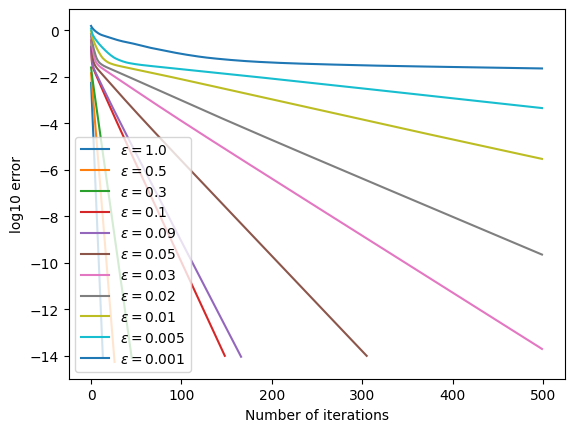

In [16]:
epsilons = [ 1.0, 0.5, 0.3, 0.1, 0.09, 0.05, 0.03, 0.02, 0.01, 0.005, 0.001 ]
results_logSinkhorn = []
times_logSinkhorn = []
#Cost matrix
C = distmat(x,y)
for eps in epsilons:

  print( "Log-Sinkhorn for epsilon = "+str(eps)+":" )    
  

  print( "Doing for (",N[0],N[1],")." )
  print( " |- Iterating" )

  start = time.time()
  out = log_sinkhorn( a,b, C, eps, a, niter = 500 )
  results_logSinkhorn.append( out )
  end = time.time()
  times_logSinkhorn.append(1e-3*(end-start) )
  plt.plot( np.log10(out['error']), label='$\epsilon=$' + str(eps ) ) 
plt.legend()
plt.xlabel( 'Number of iterations' )
plt.ylabel( 'log10 error' )
plt.show()

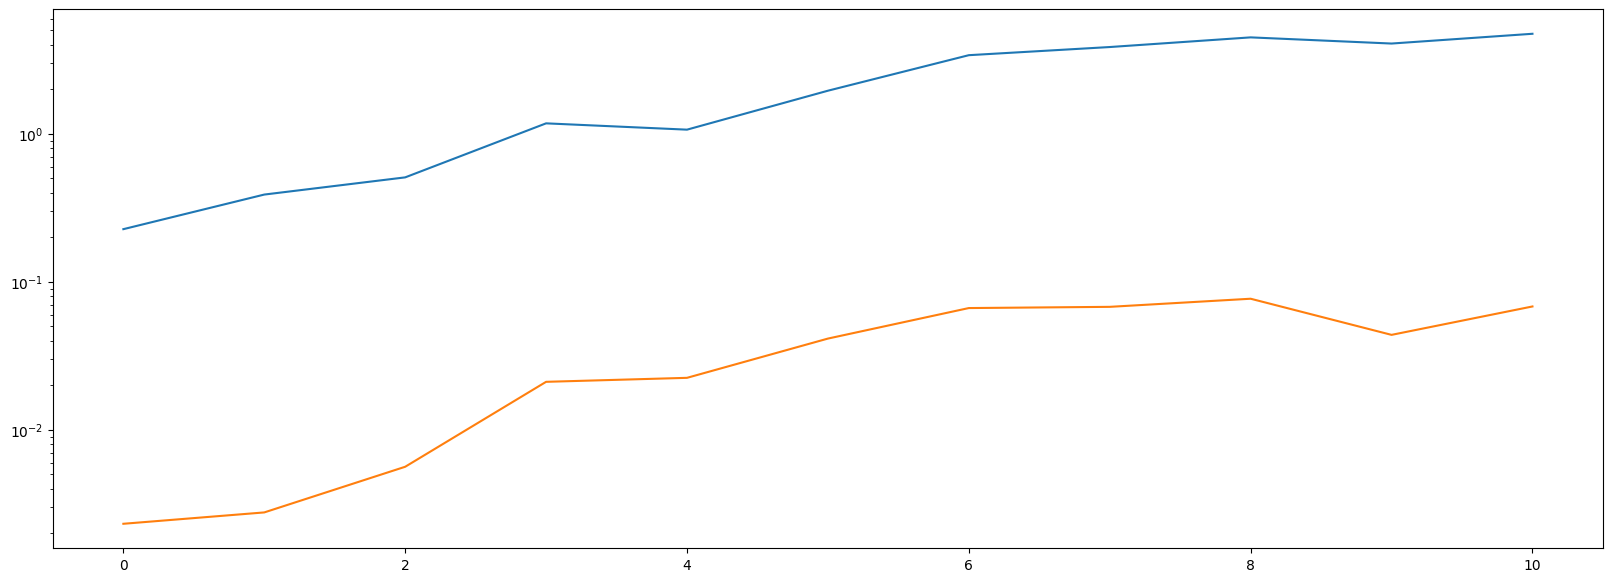

In [17]:
plt.figure(figsize = (20,7))
plt.plot(times_Sinkhorn)
plt.plot(times_logSinkhorn)
plt.yscale('log')
plt.show()


# Speed Test

In [18]:
!pip install perfplot

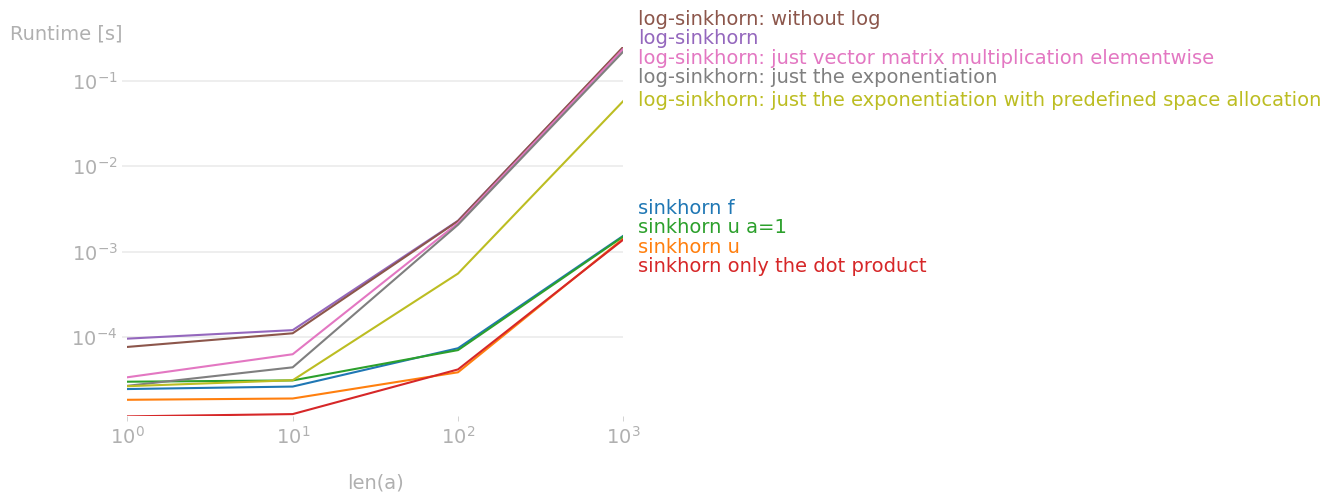

In [2]:
import numpy as np
import perfplot
epsilon = 0.001

perfplot.show(
    setup = lambda n : (np.random.rand(n, n),np.random.rand(n,1)) ,
    kernels = [
        lambda A, x : np.exp((x/np.dot( A, x))),
        lambda A, x : x/np.dot( A, x),
        lambda A, x : 1/np.dot( A, x),
        lambda A, x : np.dot( A, x),
        
        lambda A, x : np.log( np.sum(x*np.exp(-(A)/epsilon), axis = 0) ),
        lambda A, x : np.sum(x*np.exp(-(A)/epsilon), axis=0),
        lambda A, x : x*np.exp(-(A)/epsilon) ,
        lambda A, x : np.exp(-(A)/epsilon) ,
        lambda A, x : np.exp(-(A)/epsilon, out = A) ,
        ],
    labels = ["sinkhorn f", 
              "sinkhorn u",
              "sinkhorn u a=1", 
              "sinkhorn only the dot product",
              "log-sinkhorn",
              "log-sinkhorn: without log",
              "log-sinkhorn: just vector matrix multiplication elementwise", 
              "log-sinkhorn: just the exponentiation",
              "log-sinkhorn: just the exponentiation with predefined space allocation"],
    n_range = [10 ** k for k in range(4)],
    xlabel = "len(a)",
    equality_check = False, 
)

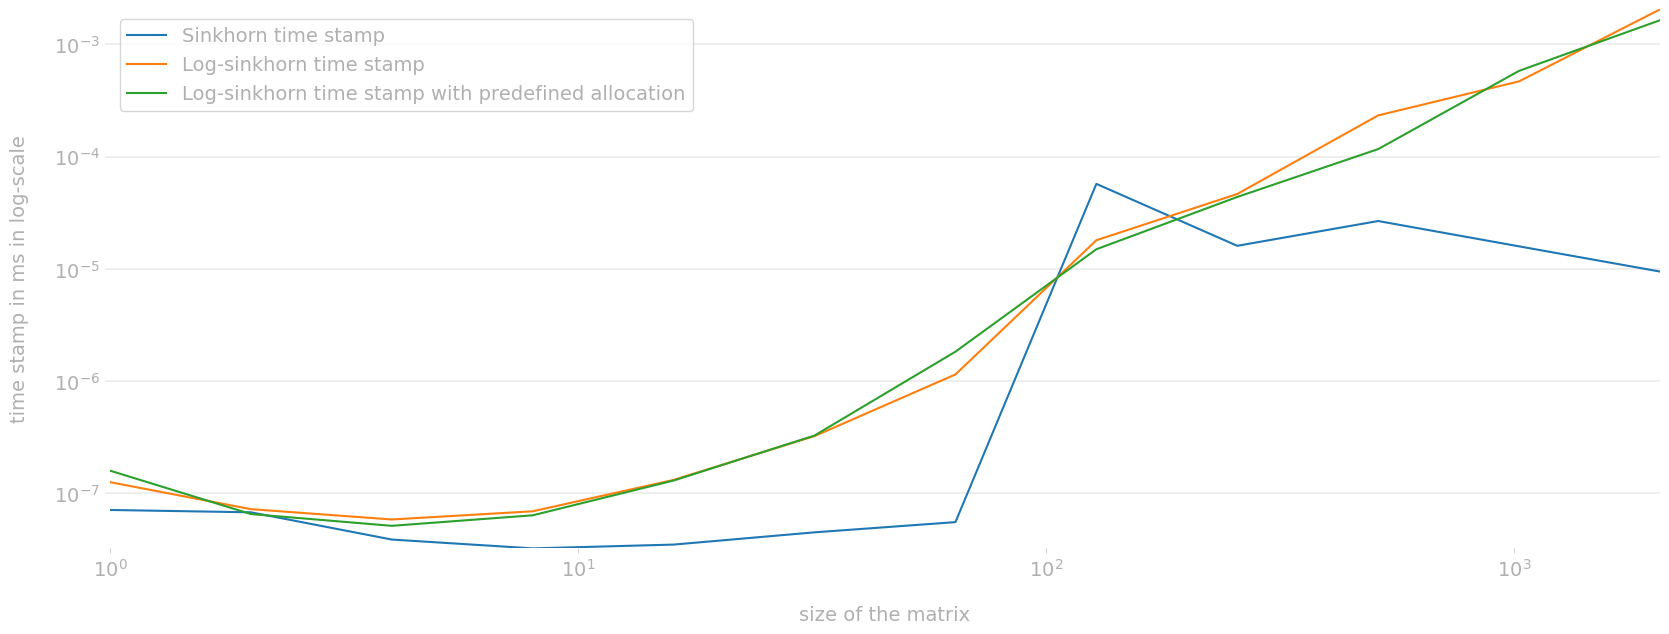

In [23]:
timesinkhorn = []
timelogsinkhorn1 = []   
timelogsinkhorn2 = []
epsilon = 0.001
np.random.seed(100)
for i in range(12):
    A = np.random.rand(2**i,2**i)
    x = np.random.rand(2**i)

    #Sinkhorn
    start = time.time()
    np.dot( A, x)
    end = time.time()
    timesinkhorn.append(1e-3*(end-start))

    # Log-sinkhorn
    start = time.time()
    np.exp(-(A)/epsilon)
    end = time.time()
    timelogsinkhorn1.append(1e-3*(end-start))

    # Log-sinkhorn with a preassigned allocation
    B = np.eye(2**i)    
    start = time.time()
    np.exp(-(A)/epsilon, out = B)
    end   = time.time()
    timelogsinkhorn2.append(1e-3*(end-start))
size = [2**i for i in range(12)]
plt.figure(figsize = (20,7))
plt.plot(size, timesinkhorn, label = "Sinkhorn time stamp")
plt.plot(size, timelogsinkhorn1, label = "Log-sinkhorn time stamp  ")
plt.plot(size, timelogsinkhorn2, label = "Log-sinkhorn time stamp with predefined allocation")
plt.ylabel('time stamp in ms in log-scale')
plt.xlabel('size of the matrix')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()